In [1]:
s1={'cherry','orange','banana','tomato'}
s2={'potato','celery','carrot','tomato'}
print('potato'in s1)

False


In [15]:
import re
pattern1='cat'
pattern2='bird'
string='dogs rans to cats'
print(pattern1 in string)
print(pattern2 in string)

True
False


In [11]:
if re.search(pattern2,string):
    print('match')
else:
    print('could not find')

could not find


In [22]:
ptn="r[au]n"
print(re.search(ptn,string))
print(re.search("r[a-z]n","dogs rans to cats"))

<re.Match object; span=(5, 8), match='ran'>
<re.Match object; span=(5, 8), match='ran'>


In [40]:
string1="hello world \nmy name is elvis\nmymynjsnjd"
print(string1)
print(re.search(r"my*",string1,flags=re.M))

hello world 
my name is elvis
mymynjsnjd
<re.Match object; span=(13, 15), match='my'>


In [60]:
print(re.search('ab{2,10}','abbbbb'))

<re.Match object; span=(0, 6), match='abbbbb'>


In [68]:
print(re.search('r\dnms','run,r4nms'))
print(re.search('r\Dn','run,r4nms'))   #\d匹配所有数字 \D匹配所有字母

<re.Match object; span=(4, 9), match='r4nms'>
<re.Match object; span=(0, 3), match='run'>


### 所有字母数字和“_”


In [73]:
# \w [0-9 a-z A-Z _]
# \W opposite to the \w 基本就剩一些特殊符号了
print(re.search('r\wn',"rnn,r4n,ru\n"))
print(re.search('r\Wn',"run,r4n,r\nn"))

<re.Match object; span=(0, 3), match='rnn'>
<re.Match object; span=(8, 11), match='r\nn'>


### 特殊字符 任意字符

In [83]:
# \\ match \
print(re.search('\\n','rwws\nwewew'))
# . match anything except \n 换行符 几乎啥都能匹配 括号减号之类
print(re.search('r.n',"r-nsjsj"))
print(re.search('r.n',"r[nsjsj]"))

<re.Match object; span=(4, 5), match='\n'>
<re.Match object; span=(0, 3), match='r-n'>
<re.Match object; span=(0, 3), match='r[n'>


### 句首句尾

In [87]:
# ^只有在句首才能匹配到 
# $ 只有在句尾才能匹配到  +表示出现1或多次  *表示0或多次
print(re.search('^run','run to the cats'))
print(re.search('cats$','run to the cats'))

<re.Match object; span=(0, 3), match='run'>
<re.Match object; span=(11, 15), match='cats'>


### Group match 



In [120]:
a = re.search('(\d+), Date:(.+)', "ID: 001842232, Date: Feb/02/28")
print(a.group())
print(a.group(1))
print(a.group(2))

001842232, Date: Feb/02/28
001842232
 Feb/02/28


In [132]:
##自己命名group name
b = re.search("(?P<ID>\d+), (?P<date>.+)", "ID: 001842232, Date: Feb/02/28")
print(b.group('ID'))
print(b.group('date'))

001842232
Date: Feb/02/28


### 寻找所有匹配


In [147]:
## findall 返回所有值  返回一个列表用于后续loop
print(re.findall('r[aux]n', 'ran, run, rxn'))
# |: or
print(re.findall('ran|run', 'ran,run,rxn, wnsn'))

['ran', 'run', 'rxn']
['ran', 'run']


### 替换


In [141]:
# re.sub() : replace 
print(re.sub('r[au]n','catches', "dogs ran to run cats"))
print(re.sub('r[au]n','catches', "dogs rans to runs cats")) 

dogs catches to catches cats
dogs catchess to catchess cats


### 分裂

In [146]:
#re.split() 
print(re.split("[,;]", "a, b ;2022, xxx"))
print(re.split("[,;\.]", "a, b ;2022, xxx, 04.18"))  #\n 防止.被识别成所有值

['a', ' b ', '2022', ' xxx']
['a', ' b ', '2022', ' xxx', ' 04', '18']


### 综合分析

In [166]:
import re
m=re.search("\$((\d+,){2,}\d+)" ,"That will be $1,000,000") # dollar sign has special meaning here to escape that
# using back slash to aviod that, here it is a literal dollar sign 
# \d+ means one and one more digits
print(m.group(1))
print(re.search('\$',"That will be $1,000,000" ))
print(re.search('(\d+,)',"That will be $1,000,000" ))
print(re.search('(\d+,){2,}',"That will be $1,000,000" ))

1,000,000
<re.Match object; span=(13, 14), match='$'>
<re.Match object; span=(14, 16), match='1,'>
<re.Match object; span=(14, 20), match='1,000,'>


In [195]:
print(re.search('\d{2,}',"201323,201423"))
print(re.findall('\d{2,}',"201323,201423,789"))
print(re.findall('\d+',"asdfghjklzxc"))
print(re.findall('\D+',"asdfghjklzxc"))


<re.Match object; span=(0, 6), match='201323'>
['201323', '201423', '789']
[]
['asdfghjklzxc']
['asdfg,sdfg']


## Map function

In [207]:
l1=[1,2,3,4,5,6,7,8]
def func(x):
    return x**x
print(list(map(func,l1)))
## which is  equivalent to the map function 
print([func(x) for x in l1])   ## no commma 

[1, 4, 27, 256, 3125, 46656, 823543, 16777216]
[1, 4, 27, 256, 3125, 46656, 823543, 16777216]


## zip function 

In [218]:
m=[1,2,3]
n=[4,5,6]
zip(m,n)
print(list(zip(m,n)))
print(list(zip(m,m,n)))
print(list(zip(m,m,n,n)))  ##either 2 or 3 or 4 arguments here to zip together
for i,j in zip(m,n):
    print(i*2,j*j)

[(1, 4), (2, 5), (3, 6)]
[(1, 1, 4), (2, 2, 5), (3, 3, 6)]
[(1, 1, 4, 4), (2, 2, 5, 5), (3, 3, 6, 6)]
2 16
4 25
6 36


## Lamda function

In [230]:
def zkh(x,y):
    return(x+y)
print(zkh(5,6))
zkh2=lambda x,y: x+y  ##参数 followed by function 比def函数 少一行代码 不需要再输入return
print(zkh2(5,6))

11
11


## Stemming and lemmatization

In [235]:
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
for w in ['monkeys','cities','complexity','Reades']:
    print(f"Lemmatization:{wnl.lemmatize(w)}")

Lemmatization:monkey
Lemmatization:city
Lemmatization:complexity
Lemmatization:Reades


In [ ]:
wnl

In [72]:
tmp.columns=['name','year','job','nice']
tmp['index']=range(len(tmp))
tmp

,name,year,job,nice,index
0,52,98,24,18,0
1,29,28,35,27,1
2,98,97,42,59,2
3,69,84,41,62,3
4,24,99,24,54,4
...,...,...,...,...,...
1195,72,18,94,65,1195
1196,40,73,42,97,1196
1197,40,59,23,12,1197
1198,15,99,56,49,1198


In [73]:
tmp.set_index('index',inplace=True)
tmp

,name,year,job,nice
index,,,,
0,52,98,24,18
1,29,28,35,27
2,98,97,42,59
3,69,84,41,62
4,24,99,24,54
...,...,...,...,...
1195,72,18,94,65
1196,40,73,42,97
1197,40,59,23,12


NameError: name 'plt' is not defined

In [77]:
import matplotlib.pyplot as plt
help(plt.axvline)

Help on function axvline in module matplotlib.pyplot:

axvline(x=0, ymin=0, ymax=1, **kwargs)
    Add a vertical line across the Axes.
    
    Parameters
    ----------
    x : float, default: 0
        x position in data coordinates of the vertical line.
    
    ymin : float, default: 0
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    ymax : float, default: 1
        Should be between 0 and 1, 0 being the bottom of the plot, 1 the
        top of the plot.
    
    Returns
    -------
    `~matplotlib.lines.Line2D`
    
    Other Parameters
    ----------------
    **kwargs
        Valid keyword arguments are `.Line2D` properties, with the
        exception of 'transform':
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
        alpha: scalar or None
        animated: bool
        antialiased or aa: bool
        clip_box: `.Bbox`


<AxesSubplot:>

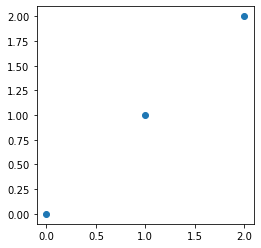

In [90]:
import geopandas as gpd
df = pd.DataFrame({'x': [0, 1, 2], 'y': [0, 1, 2], 'z': [0, 1, 2]})
a1 = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['x'], df['y']))
a1.plot()

In [91]:
import pandas as pd
df1 = pd.DataFrame({'x': [0, 1, 2], 'y': [0, 1, 2], 'z': [0, 1, 2]})

<AxesSubplot:>

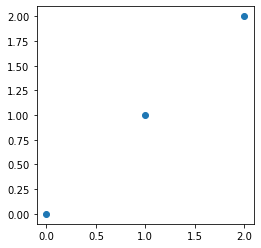

In [97]:
geometry = gpd.points_from_xy(x=[1, 0], y=[0, 1])
geometry = gpd.points_from_xy(df['x'], df['y'], df['z'])
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['x'], df['y']))
gdf.plot()

In [98]:
help(df.plot.scatter)

Help on method scatter in module pandas.plotting._core:

scatter(x, y, s=None, c=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Create a scatter plot with varying marker point size and color.
    
    The coordinates of each point are defined by two dataframe columns and
    filled circles are used to represent each point. This kind of plot is
    useful to see complex correlations between two variables. Points could
    be for instance natural 2D coordinates like longitude and latitude in
    a map or, in general, any pair of metrics that can be plotted against
    each other.
    
    Parameters
    ----------
    x : int or str
        The column name or column position to be used as horizontal
        coordinates for each point.
    y : int or str
        The column name or column position to be used as vertical
        coordinates for each point.
    s : str, scalar or array-like, optional
        The size of each point. Possible values are:
    
       

In [103]:
df1 = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                [6.4, 3.2, 1], [5.9, 3.0, 2]],              
                columns=['length', 'width', 'species'])
df1

,length,width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,7.0,3.2,1
3,6.4,3.2,1
4,5.9,3.0,2


In [140]:
df2=pd.DataFrame({'col1': [0, 1, 2, 3], 'col2':[2, 3,4,6]})
df2
df2.loc[[0,1,2,3]]
df2['index']=range(len(df2))
df3=df2.set_index('index')
df3

,col1,col2
index,,
0,0,2
1,1,3
2,2,4
3,3,6


In [144]:
df3.loc[0:3,['col1','col2']]

,col1,col2
index,,
0,0,2
1,1,3
2,2,4
3,3,6


In [163]:
df3.iloc[0:4,0:2]

,col1,col2
index,,
0,0,2
1,1,3
2,2,4
3,3,6
